# DataGym API Wrapper 

## Install Package

#### Experimental Setup: 
- Install Package from Test Python Package Index: https://test.pypi.org/ 
- DataGym: https://test.pypi.org/project/datagym/0.1.5/
- Using local Endpoints: localhost:8080/{API}

In [1]:
!pip install -i https://test.pypi.org/simple/ --no-deps datagym==0.1.6

Looking in indexes: https://test.pypi.org/simple/


#### Release
- Publish Package in official Python Package Index: https://pypi.org/

In [ ]:
!pip install datagym

## Examples
### Get your Projects and Datasets

<p> 1. Import the DataGym API Wrapper </p>

In [5]:
from datagym import Client

<br />
<p> 2. Create the DataGym client with your API Token </p>

In [6]:
client = Client(api_key="38641a09-cdf1-448e-bbc6-8e49109f7b63")

In [7]:
# DEVELOPERS NOTE: Change your Base Path to run on a specific Host
client._endpoint.BASE_PATH = "http://localhost:8080/"

<br />
<p> 3. Get your Projects! </p>

In [8]:
projects = client.get_projects()

print("You have {} Projects!".format(len(projects)))

You have 3 Projects!


<br />
<p> Create your own reports! </p>

In [9]:
for project in projects:
    print("\n\n{}".format(70*"="))
    
    print(f'{"Project:":<15} {project.name}')
    print(f'{"Description:":<15} {project.short_description}')
    print(f'{"Datasets:":<15} {len(project.datasets)}')
    
    for dataset in project.datasets:
        print("\n{}".format(40*"-"))

        print(f'{"Dataset:":<15} {dataset.name}')
        print(f'{"Description:":<15} {dataset.short_description}')
        print(f'{"Images:":<15} {len(dataset.images)}')




Project:        Empty Project
Description:    it is empty
Datasets:       1

----------------------------------------
Dataset:        new_data_5
Description:    None
Images:         1


Project:        Cats
Description:    Labeling Cats Task
Datasets:       1

----------------------------------------
Dataset:        Cats from Pixabay
Description:    None
Images:         2330


Project:        Dummy_Project
Description:    A project that helps to track cars from an arial drone
Datasets:       1

----------------------------------------
Dataset:        Dummy_Dataset_One
Description:    None
Images:         10


### Export Labeled Data

In [ ]:
dummy_project = client.get_project_by_name("Dummy_Project")
labeled_data = client.export_labels(dummy_project.id) 

### Download Images

In [7]:
dummy_project = client.get_project_by_name("Dummy_Project")

In [10]:
dummy_images = dummy_project.get_images()
first_dummy_imag = dummy_images[0] 

In [13]:
first_image = dummy_images[0]

In [14]:
image_data = client.download_image_bytes(image_id=first_image.id) # byte values of the image

<p> 1. Get all your Datasets </p>

In [4]:
datasets = client.get_datasets()

print("You have {} Datasets!".format(len(datasets)))

You have 11 Datasets!


In [28]:
t = tuple(("a", 5))
print(t[0], t[1])

a 5


In [49]:
temp_dict = [f"{e[0]}='{e[1]}'" for e in projects[0].__dict__.items() if e[0] != "datasets"]
temp_dict += ["Datasets=<List[Dataset] with {} elements>".format(len(projects[0].datasets))]
print("<Project({{{properties}}})>".format(properties=", ".join(temp_dict)))

<Project({id='4b00ca77-c97c-4547-b02b-560f96094865', name='Empty Project', short_description='it is empty', timestamp='1584093144422', label_config_id='72d2bf4b-e4a6-436f-bdd6-57c9cdc96f1a', label_iteration_id='3d9e688c-4a8e-405b-b827-e981c4ec95f1', owner='3360f10f-a5ab-48a6-966c-cdba2d63116a', Datasets=<List[Dataset] with 1 elements>})>


In [30]:
[entry[0] for entry in projects[0].__dict__.items()]

['4b00ca77-c97c-4547-b02b-560f96094865',
 'Empty Project',
 'it is empty',
 1584093144422,
 '72d2bf4b-e4a6-436f-bdd6-57c9cdc96f1a',
 '3d9e688c-4a8e-405b-b827-e981c4ec95f1',
 '3360f10f-a5ab-48a6-966c-cdba2d63116a',
 [<Dataset {'id': 'c9f1c794-3cfe-4b84-b6db-6cb60728e7a1', 'name': 'new_data_5', 'short_description': None, 'timestamp': 1584456023928, 'owner': '3360f10f-a5ab-48a6-966c-cdba2d63116a', 'images': [<Image {'id': '43c0820d-c13e-482e-b2fe-e1c8c0d4d307', 'image_name': 'cats-796437__480.jpg', 'image_type': 'SHAREABLE_LINK', 'timestamp': 1584613953692}>]}>]]

<br />
<p> 2. Choose an image from your Dataset </p>

In [7]:
for dataset in datasets:
    if dataset.images:
        first_image = dataset.images[0]
        print("I found the image named '{}'".format(first_image.image_name))
        break

I found the image named 'Sequenz%2001.00_03_31_12.Standbild001.jpg'


<br />
<p> 3. Download the Image's byte stream directly from our API </p>

In [8]:
image_data = client.download_image_bytes(image_id=first_image.id) # byte values of the image

<br />
<p> Now you can process your images as you like! </p>

In [19]:
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image
import io

image = Image.open(io.BytesIO(image_data))
image.show()

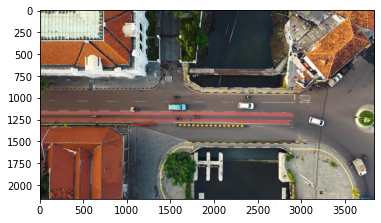

In [21]:
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image
import io

image = Image.open(io.BytesIO(image_data))
%matplotlib inline
#image.show()
imshow(np.asarray(image))

## Errors?

In [10]:
client.add_dataset(dataset_id='c9f1c794-3cfe-4b84-b6db-6cb60728e7a1', project_id='4b00ca77-c97c-4547-b02b-560f96094865')

APIException:  
                        HTTP 500 
                        key = ex_gen_contains, 
                        msg = No msg available for key: ex_gen_contains, 
                        params = Project, Dataset
                        details = 
                    

## Data Models:

#### Projects

In [ ]:
projects[1].__dict__

#### Datasets

In [ ]:
projects[1].datasets[0].__dict__

#### Images

In [ ]:
first_image.__dict__